In [1]:
# Import libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import data
dataset = pd.read_csv('data/Churn_Modelling.csv')
dataset.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
dataset.shape

(10000, 14)

In [4]:
# Division independant features and target
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [5]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [6]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [7]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
# Encodage des données
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
preprocess = make_column_transformer(
        (OneHotEncoder(), ['Geography', 'Gender']),
        (StandardScaler(), ['CreditScore', 'Age', 'Tenure', 'Balance',
                            'NumOfProducts', 'HasCrCard', 'IsActiveMember', 
                            'EstimatedSalary']))
X = preprocess.fit_transform(X)


In [9]:
X.shape

(10000, 13)

In [10]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  0.64609167,
         0.97024255,  0.02188649],
       [ 0.        ,  0.        ,  1.        , ..., -1.54776799,
         0.97024255,  0.21653375],
       [ 1.        ,  0.        ,  0.        , ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 1.        ,  0.        ,  0.        , ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 0.        ,  1.        ,  0.        , ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.        ,  0.        ,  0.        , ...,  0.64609167,
        -1.03067011, -1.07636976]])

In [26]:
X[:,0:5]

array([[1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       ...,
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1.],
       [1., 0., 0., 1., 0.]])

In [11]:
# Le OneHotEncoding crée des colonnes supplémentaires dont on peut
# éliminer une pour la variable Geographie et une pour Gender
X = np.delete(X, [0,3], axis=1)

In [29]:
# Split in train/test
#y = y.values 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Partie 2 - ANN

In [12]:
# Importing the Keras libraries and packages
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [31]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
# adding the input layer and the first hidden layer

# Il n'existe pas de règles standard pour déterminer le nombre de neurones 
# la couche cachée mais une astuce est de prendre la moitié de la somme des 
# neurones d'entrée et de sortie d'ou 6 ici.
# La méthode .add()permet d'ajouter une couche cachée mais la première fois qu'on
# crée une couche cachée, il faut définir la couche d'entrée car elle est créée automatiquement

classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))

# Adding the second hidden layer 
# Ajouter une deuxième couche cachée (Pas toujours nécessaire mais raison pédagogique)
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

# Ajouter la couche de sortie
# On a une seule variable de sortie donc un seul neurone et on choisit 1 ou 0 donc la fonction sigmoide
# comme fonction d'activation. Si c'était une classif multiclasse, on choisirait 'softmax' comme fonction
# et on aurait 3 neurones de sorties"
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
# Si l'on avait plus de 2 catégories à prédire, la loss function serait 'categorical_crossentropy
# 'adam' est la version du gradient stochastique utilisée pour mettre à jour les poids
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Entrainer le réseau de neurones
# batch_size: nombre de lignes à faire passer en meme temps dans le réseau de neurones
# epochs: nombre d'itérations
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7992 - loss: 0.5591
Epoch 2/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 924us/step - accuracy: 0.8037 - loss: 0.4222
Epoch 3/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 945us/step - accuracy: 0.7855 - loss: 0.4345
Epoch 4/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7986 - loss: 0.4236
Epoch 5/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8076 - loss: 0.4285
Epoch 6/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8192 - loss: 0.4055
Epoch 7/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8304 - loss: 0.3994
Epoch 8/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8247 - loss: 0.4093
Epoch 9/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8300 - loss: 0.4000
Epoch 10/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8304 - loss: 0.4053
Epoch 11/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8376 - loss: 0.3867
Epoch 12/100
800/800 ━━━━━━━━━━━━━━━━

## Partie 3 - Prédictions et Évaluation

In [32]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [33]:
y_pred[y_pred>0.5]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [34]:
# Faire des prédiction avec le réseau de neurones entrainé
# Exercice: Prédire un seule prédiction
"""Predict if the customer with the following informations will leave the bank:
Geography: France
Credit Score: 600
Gender: Male
Age: 40
Tenure: 3
Balance: 60000
Number of Products: 2
Has Credit Card: Yes
Is Active Member: Yes
Estimated Salary: 50000"""
Xnew = pd.DataFrame(data={
        'CreditScore': [600], 
        'Geography': ['France'], 
        'Gender': ['Male'],
        'Age': [40],
        'Tenure': [3],
        'Balance': [60000],
        'NumOfProducts': [2],
        'HasCrCard': [1],
        'IsActiveMember': [1],
        'EstimatedSalary': [50000]})
Xnew = preprocess.transform(Xnew)
Xnew = np.delete(Xnew, [0,3], 1)
new_prediction = classifier.predict(Xnew)
new_prediction = (new_prediction > 0.5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [35]:
new_prediction

array([[False]])

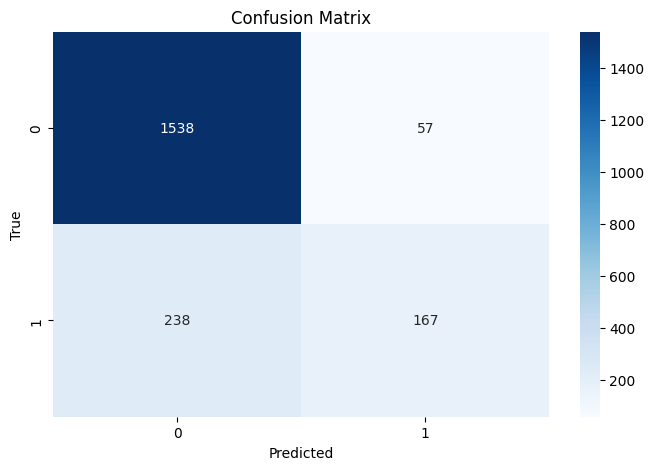

In [45]:
# La matrice de confusion
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=[8,5])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



In [37]:
print(cm)

[[1538   57]
 [ 238  167]]


In [38]:
# Evaluattion du modèle avec la validation croisée
# Ci-dessous l'ANN écrit sous-forme de fonction 
def build_classifier(optimizer='adam'):
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier



In [39]:
# Evaluate
# le module ci-dessous permet de faire le pont entre scikit_learn et keras pour la k-fold cross-validation
# utiliser les modules existant dans scikit_learn

from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
classifier = KerasClassifier(build_fn = build_classifier, batch_size = 10, epochs = 100)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, 
                             cv = 10, n_jobs = -1)
mean = accuracies.mean()
variance = accuracies.std()

In [40]:
mean

0.8435

In [ ]:
# Importing the Keras libraries and packages
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
print(mean)

In [ ]:
print(variance)

In [46]:
# # Optimisation des hyperparametres avec GridSearchCV

from sklearn.model_selection import GridSearchCV
classifier = KerasClassifier(build_fn = build_classifier)
parameters = {'batch_size': [25, 32],
              'epochs': [100, 500],
              'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10)
grid_search = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

Epoch 1/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7822 - loss: 0.6431
Epoch 2/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7945 - loss: 0.4414
Epoch 3/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7938 - loss: 0.4388
Epoch 4/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - accuracy: 0.7947 - loss: 0.4326
Epoch 5/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7966 - loss: 0.4329
Epoch 6/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7980 - loss: 0.4283
Epoch 7/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8049 - loss: 0.4111
Epoch 8/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7997 - loss: 0.4158
Epoch 9/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8058 - loss: 0.4191
Epoch 10/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8300 - loss: 0.4106
Epoch 11/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8280 - loss: 0.4130
Epoch 12/100
288/288 ━━━━━━━━━━━━━━━━━━

In [ ]:
print(best_parameters)